<a href="https://colab.research.google.com/github/thepankaj018/Bike-Sharing-Demand-Prediction/blob/main/Bike_Sharing_Demand_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 



##### **Project Type**    - Regression
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes. The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
from scipy.stats import skew


In [3]:
pd.set_option('display.max_columns', None)

### Dataset Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Load Dataset
file_path = "/content/drive/MyDrive/SeoulBikeData.csv"
df = pd.read_csv(file_path,encoding= 'unicode_escape')

### Dataset First View

In [6]:
# Dataset First Look
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
print(f'number of rows in dataframe are {df.shape[0]}')
print(f'number of columns in dataframe are {df.shape[1]}')

number of rows in dataframe are 8760
number of columns in dataframe are 14


### Dataset Information

In [8]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
print(f'number of duplicates values are {df.duplicated().sum()}')

number of duplicates values are 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

####No Missing values are present in the dataframe. 

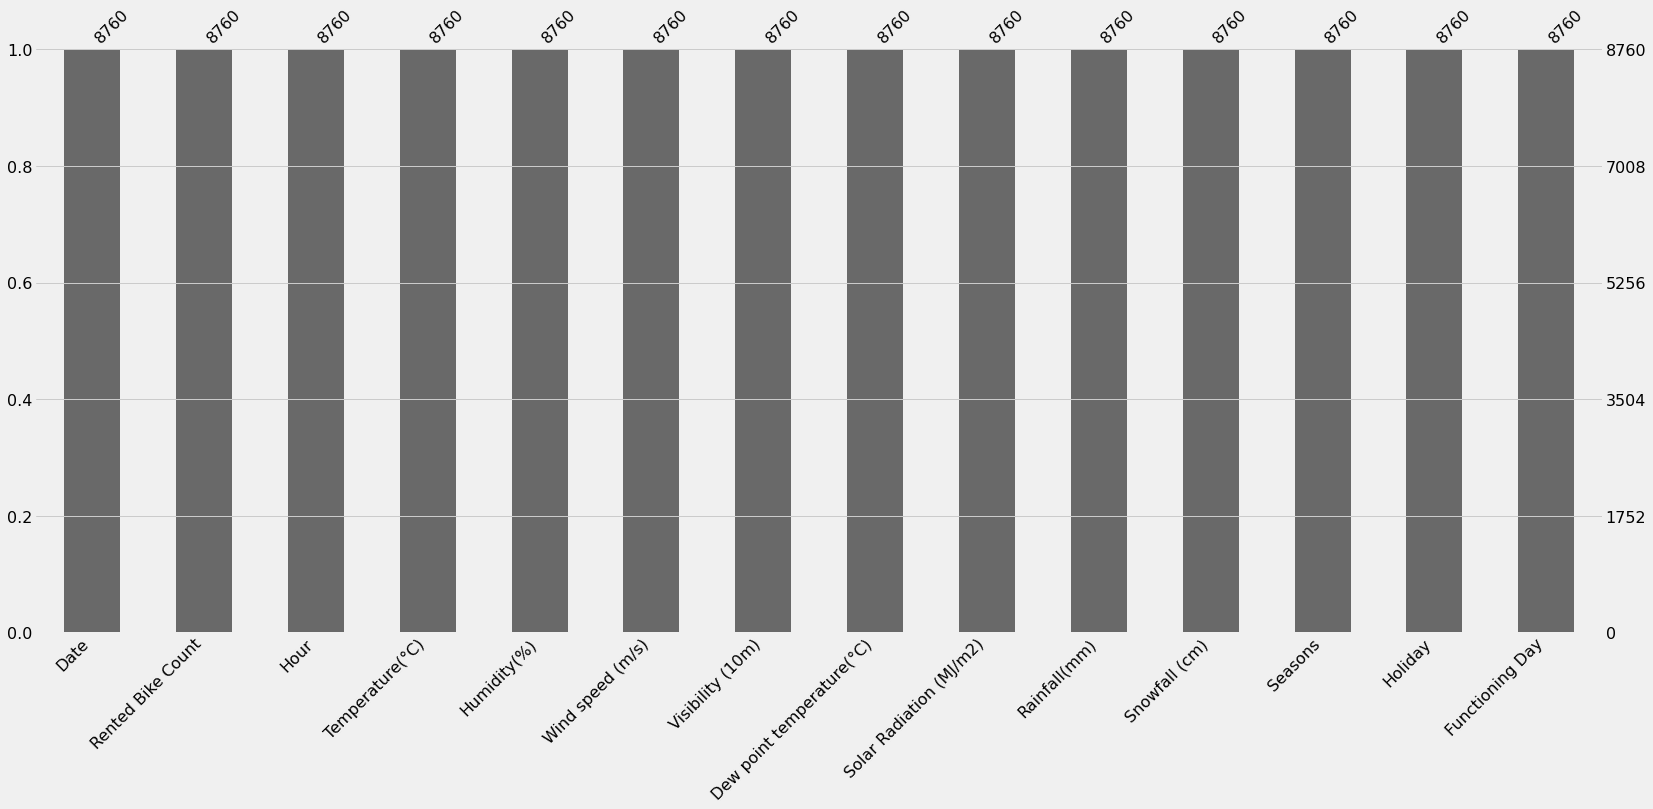

In [11]:
# Visualizing the missing values
import missingno as msno
msno.bar(df)
plt.show()

###ABOUT MISSINGNO LIBRARY - Missingno provides a small toolset of flexible and easy-to-use missing data visualizations and utilities that allows us to get a quick visual summary of the completeness (or lack thereof) of our dataset. 

### It is clearly seen from the above visualization that there is no missing value present in the datasets.

### What did you know about your dataset?

###1) There are 8760 rows and 14 columns present in dataset.
###2) Datatypes of variables present in datasets are integer,float and object.
###3) There is no duplicate entries in the dataset.
###4) There is no missing values present in the datasets.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
df.columns

Index(['Date', 'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Seasons',
       'Holiday', 'Functioning Day'],
      dtype='object')

In [13]:
# Dataset Describe
df.describe().T.style.background_gradient(cmap='RdPu')

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.000000,704.602055,644.997468,0.000000,191.000000,504.500000,1065.250000,3556.000000
Hour,8760.000000,11.500000,6.922582,0.000000,5.750000,11.500000,17.250000,23.000000
Temperature(°C),8760.000000,12.882922,11.944825,-17.800000,3.500000,13.700000,22.500000,39.400000
Humidity(%),8760.000000,58.226256,20.362413,0.000000,42.000000,57.000000,74.000000,98.000000
Wind speed (m/s),8760.000000,1.724909,1.036300,0.000000,0.900000,1.500000,2.300000,7.400000
Visibility (10m),8760.000000,1436.825799,608.298712,27.000000,940.000000,1698.000000,2000.000000,2000.000000
Dew point temperature(°C),8760.000000,4.073813,13.060369,-30.600000,-4.700000,5.100000,14.800000,27.200000
Solar Radiation (MJ/m2),8760.000000,0.569111,0.868746,0.000000,0.000000,0.010000,0.930000,3.520000
Rainfall(mm),8760.000000,0.148687,1.128193,0.000000,0.000000,0.000000,0.000000,35.000000
Snowfall (cm),8760.000000,0.075068,0.436746,0.000000,0.000000,0.000000,0.000000,8.800000


### Variables Description 


*  Date : year-month-day
*  Rented Bike count - Count of bikes rented at each hour
*  Hour - Hour of the day
*  Temperature-Temperature in Celsius
*  Humidity - %
*  Windspeed - m/s
*  Visibility - 10m
*  Dew point temperature - Celsius
*  Solar radiation - MJ/m2
*  Rainfall - mm
*  Snowfall - cm
*  Seasons - Winter, Spring, Summer, Autumn
*  Holiday - Holiday/No holiday
*  Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
for elem in df.columns:
  print("-"*100)
  print(" ")
  print(f'Unique values present in {elem} are')
  print(" ")
  print(df[elem].unique())
  print(" ")
  print("*"*100)

----------------------------------------------------------------------------------------------------
 
Unique values present in Date are
 
['01/12/2017' '02/12/2017' '03/12/2017' '04/12/2017' '05/12/2017'
 '06/12/2017' '07/12/2017' '08/12/2017' '09/12/2017' '10/12/2017'
 '11/12/2017' '12/12/2017' '13/12/2017' '14/12/2017' '15/12/2017'
 '16/12/2017' '17/12/2017' '18/12/2017' '19/12/2017' '20/12/2017'
 '21/12/2017' '22/12/2017' '23/12/2017' '24/12/2017' '25/12/2017'
 '26/12/2017' '27/12/2017' '28/12/2017' '29/12/2017' '30/12/2017'
 '31/12/2017' '01/01/2018' '02/01/2018' '03/01/2018' '04/01/2018'
 '05/01/2018' '06/01/2018' '07/01/2018' '08/01/2018' '09/01/2018'
 '10/01/2018' '11/01/2018' '12/01/2018' '13/01/2018' '14/01/2018'
 '15/01/2018' '16/01/2018' '17/01/2018' '18/01/2018' '19/01/2018'
 '20/01/2018' '21/01/2018' '22/01/2018' '23/01/2018' '24/01/2018'
 '25/01/2018' '26/01/2018' '27/01/2018' '28/01/2018' '29/01/2018'
 '30/01/2018' '31/01/2018' '01/02/2018' '02/02/2018' '03/02/2018'
 '0

## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

In [16]:
# Converting column Date into datetime64[ns] format
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
# Separating Day,Month.Year from dataframe column.
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [18]:
# Dropping Date columns
df.drop("Date",axis = 1,inplace = True)

In [19]:
# Sorting columns by datatypes.
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Rented Bike Count', 'Hour', 'Humidity(%)', 'Visibility (10m)', 'Day', 'Month', 'Year'], float64: ['Temperature(°C)', 'Wind speed (m/s)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)'], object: ['Seasons', 'Holiday', 'Functioning Day']}

In [20]:
# Separating Numerical and Categorical column
numerical_features = df.describe().columns.tolist()
categorical_features = list(set(df.columns.tolist()) - set(numerical_features))

In [21]:
numerical_features

['Rented Bike Count',
 'Hour',
 'Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Day',
 'Month',
 'Year']

In [22]:
categorical_features

['Seasons', 'Holiday', 'Functioning Day']

### What all manipulations have you done and insights you found?

####1)Converted column Date into datetime64[ns] format.
####2)Separated Day,Month.Year from dataframe columns.
####3)Dropped Date columns.
####4)Separated Numerical and Categorical columns.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

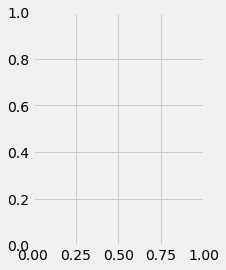

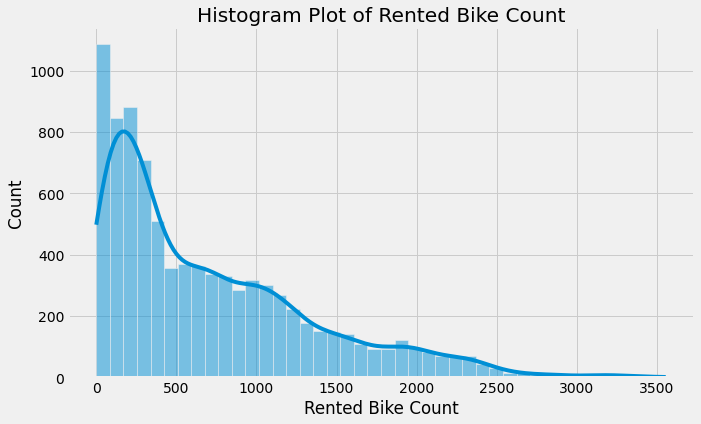

In [23]:
# Chart - 1 visualization code
plt.subplot(1,2,2)
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Rented Bike Count',kde = True)
plt.title('Histogram Plot of Rented Bike Count')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

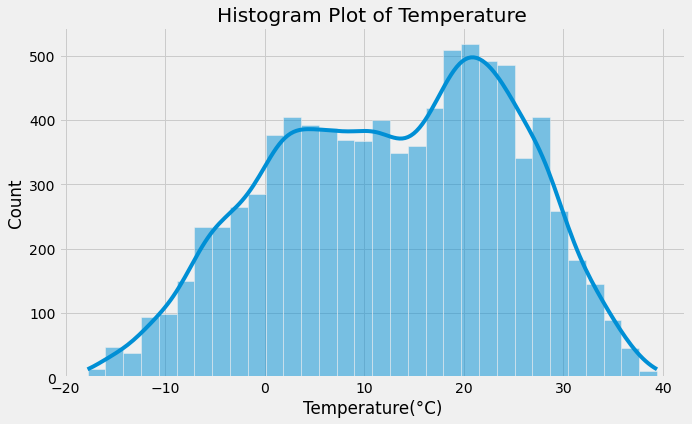

In [24]:
# Chart - 2 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Temperature(°C)',kde = True)
plt.title('Histogram Plot of Temperature')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

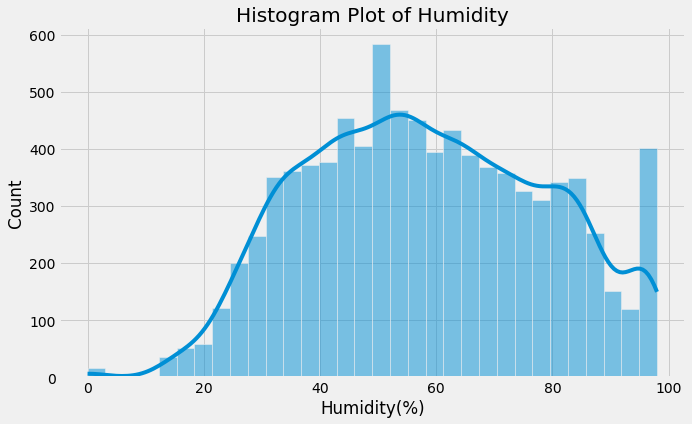

In [25]:
# Chart - 3 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Humidity(%)',kde = True)
plt.title('Histogram Plot of Humidity')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

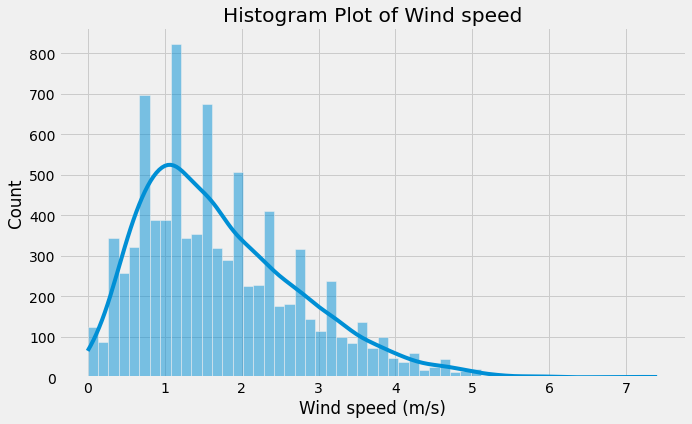

In [26]:
# Chart - 4 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Wind speed (m/s)',kde = True)
plt.title('Histogram Plot of Wind speed')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

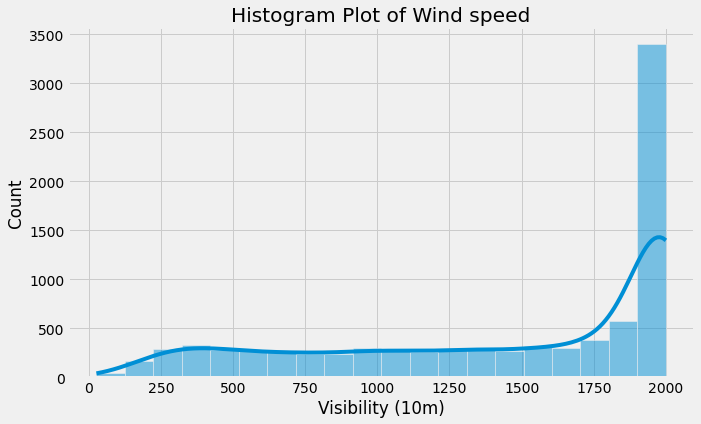

In [27]:
# Chart - 5 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Visibility (10m)',kde = True)
plt.title('Histogram Plot of Wind speed')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

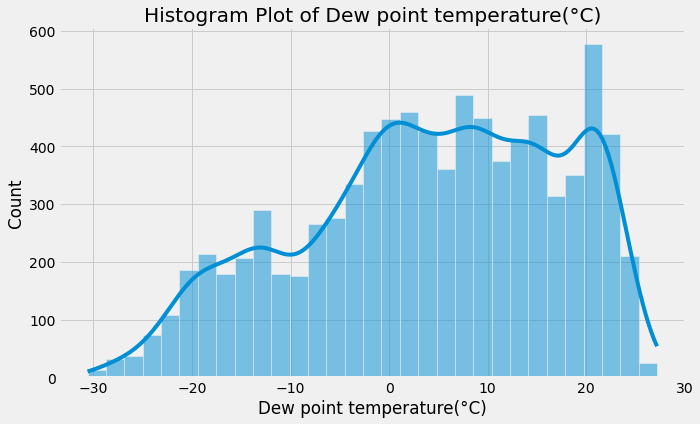

In [28]:
# Chart - 6 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Dew point temperature(°C)',kde = True)
plt.title('Histogram Plot of Dew point temperature(°C)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

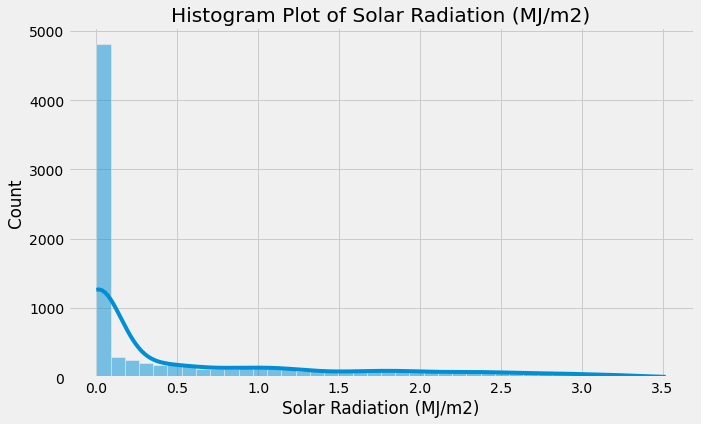

In [29]:
# Chart - 7 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Solar Radiation (MJ/m2)',kde = True)
plt.title('Histogram Plot of Solar Radiation (MJ/m2)')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

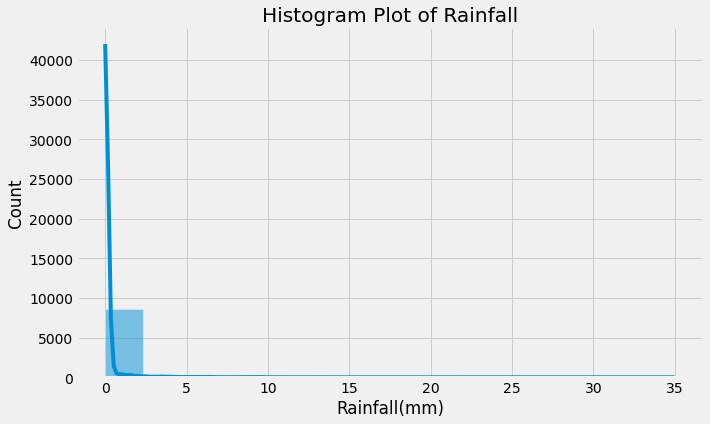

In [30]:
# Chart - 8 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Rainfall(mm)',kde = True)
plt.title('Histogram Plot of Rainfall')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

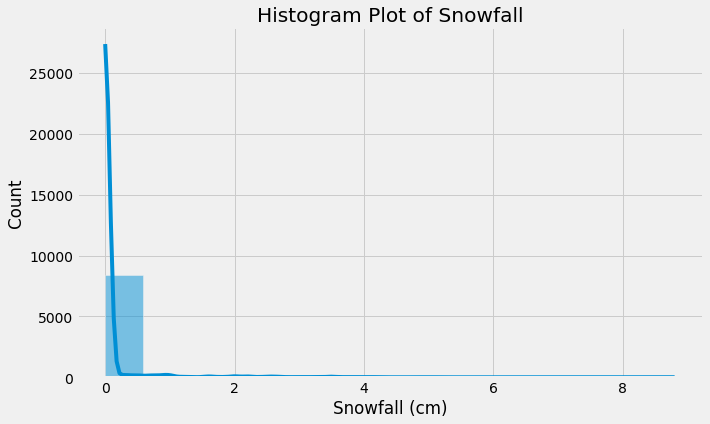

In [31]:
# Chart - 9 visualization code
plt.figure(figsize = (10,6))
sns.histplot(data = df,x = 'Snowfall (cm)',kde = True)
plt.title('Histogram Plot of Snowfall')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

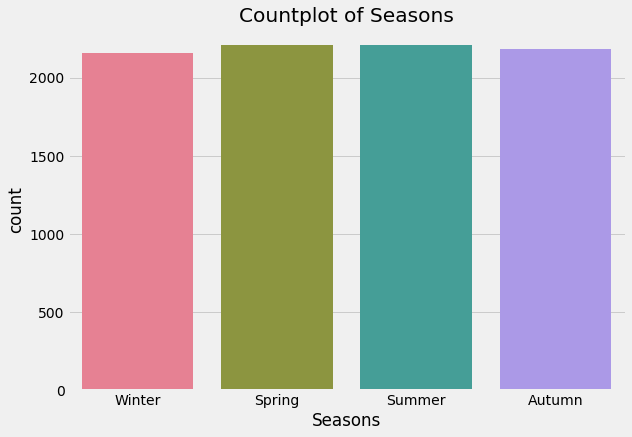

In [32]:
# Chart - 10 visualization code
sns.catplot(data = df,x = 'Seasons',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Seasons')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

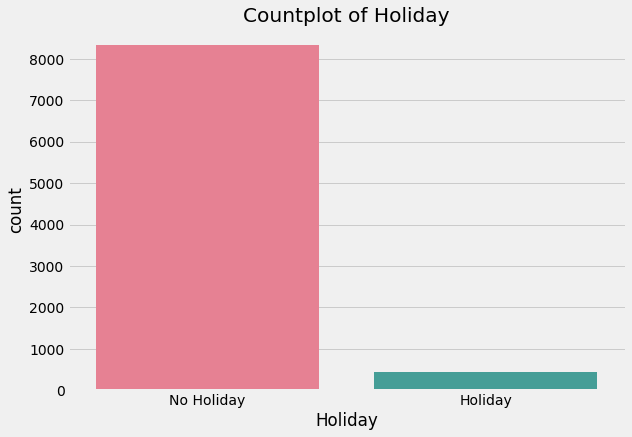

In [33]:
# Chart - 11 visualization code
sns.catplot(data = df,x = 'Holiday',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Holiday')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

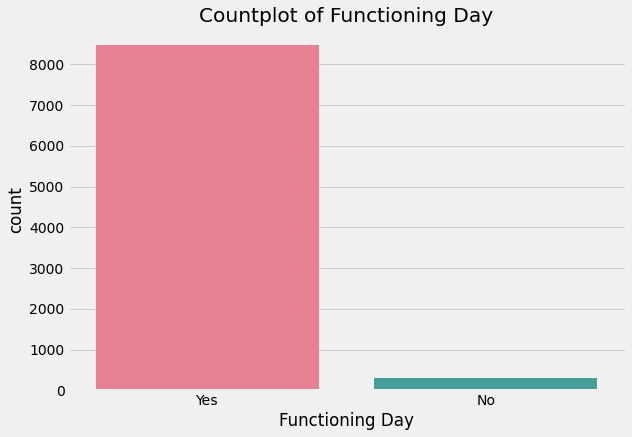

In [34]:
# Chart - 12 visualization code
sns.catplot(data = df,x = 'Functioning Day',kind = 'count',aspect = 1.5,height = 6,palette='husl')
plt.title('Countplot of Functioning Day')
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#BIVARIATE ANALYSIS

#### Chart - 13

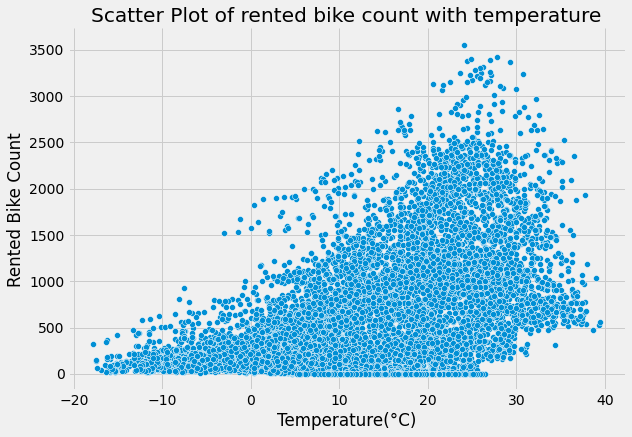

 
Correlation coefficient are :


0.5385581530139789

In [35]:
# Chart - 13 visualization code
sns.relplot(data = df,x = 'Temperature(°C)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with temperature')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Temperature(°C)'].corr(df['Rented Bike Count'])


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Chart - 14

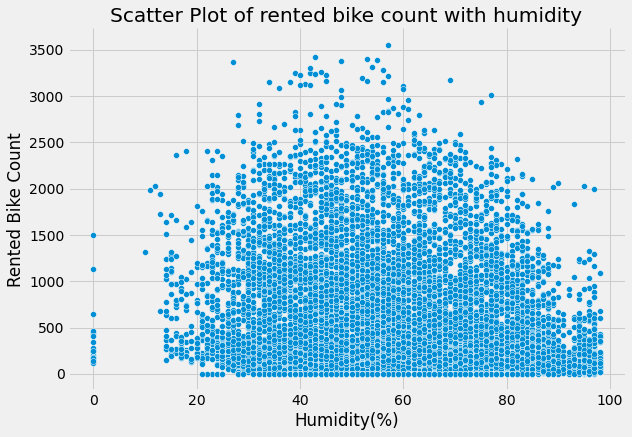

 
Correlation coefficient are :


-0.19978016700089823

In [36]:
# Chart - 14 Visualization code
sns.relplot(data = df,x = 'Humidity(%)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with humidity')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Humidity(%)'].corr(df['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Chart - 15

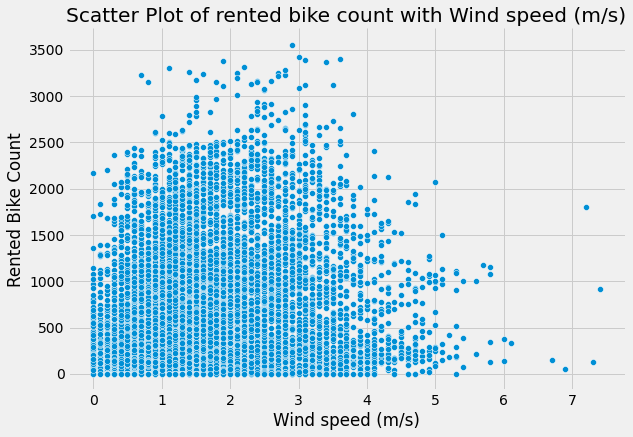

 
Correlation coefficient are :


0.12110844818838669

In [37]:
# Chart 15 Visualization code
sns.relplot(data = df,x = 'Wind speed (m/s)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Wind speed (m/s)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Wind speed (m/s)'].corr(df['Rented Bike Count'])

##### 1. Why did you pick the specific chart?

##### 2. What is/are the insight(s) found from the chart?

3.Will the gained insights help creating a positive business impact?

Are there any insights that lead to negative growth? Justify with specific reason.

Chart - 16

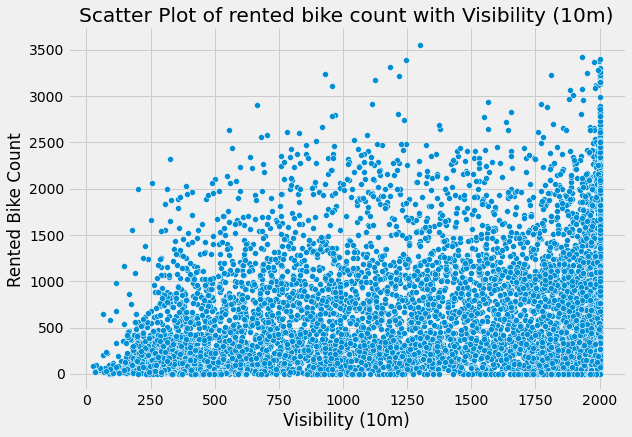

 
Correlation coefficient are :


0.19928029673135897

In [38]:
# Chart 16 Visualisation code
sns.relplot(data = df,x = 'Visibility (10m)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Visibility (10m)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Visibility (10m)'].corr(df['Rented Bike Count'])

Chart - 17

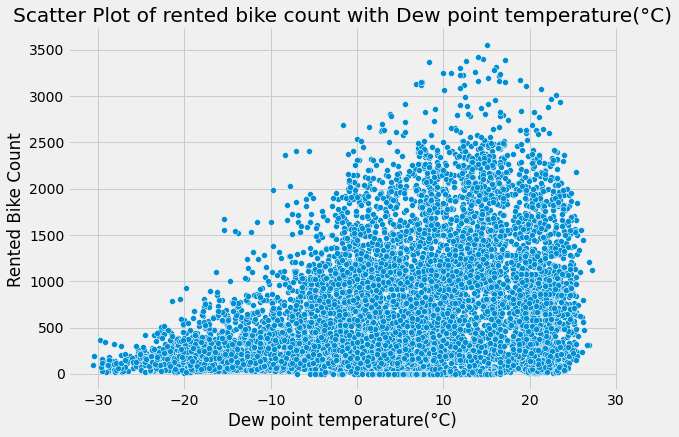

 
Correlation coefficient are :


0.37978812124497235

In [39]:
# Chart 17 Visualisation code
sns.relplot(data = df,x = 'Dew point temperature(°C)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Dew point temperature(°C)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Dew point temperature(°C)'].corr(df['Rented Bike Count'])

Chart - 18

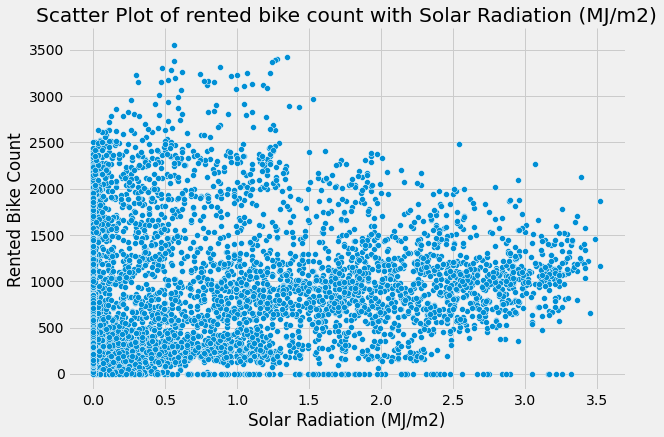

 
Correlation coefficient are :


0.261836985509591

In [40]:
# Chart 18 Visualisation code
sns.relplot(data = df,x = 'Solar Radiation (MJ/m2)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Solar Radiation (MJ/m2)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Solar Radiation (MJ/m2)'].corr(df['Rented Bike Count'])

Chart - 19

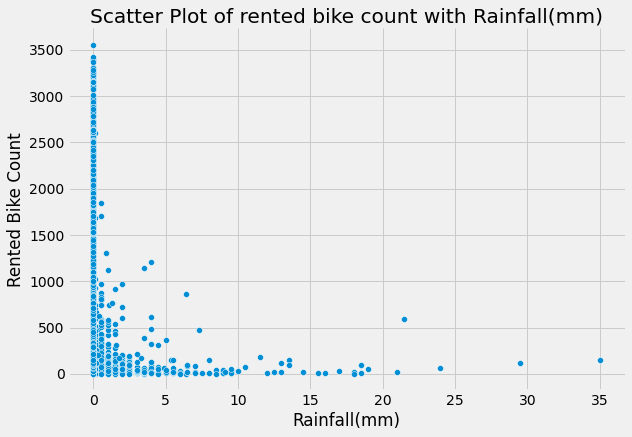

 
Correlation coefficient are :


-0.12307395980285019

In [41]:
# Chart 19 Visualisation code
sns.relplot(data = df,x = 'Rainfall(mm)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Rainfall(mm)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Rainfall(mm)'].corr(df['Rented Bike Count'])

Chart - 20

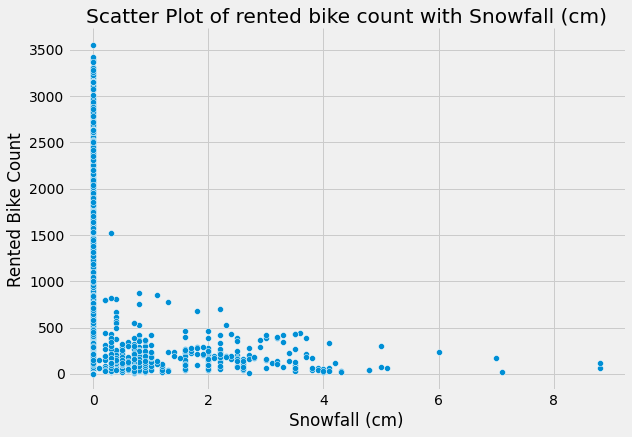

 
Correlation coefficient are :


-0.1418036499974599

In [42]:
# Chart 20 Visualisation code
sns.relplot(data = df,x = 'Snowfall (cm)',y = 'Rented Bike Count',kind = 'scatter',aspect = 1.5,height = 6)
plt.title('Scatter Plot of rented bike count with Snowfall (cm)')
plt.show()
print(" ")
print('Correlation coefficient are :')
df['Snowfall (cm)'].corr(df['Rented Bike Count'])

Chart - 21

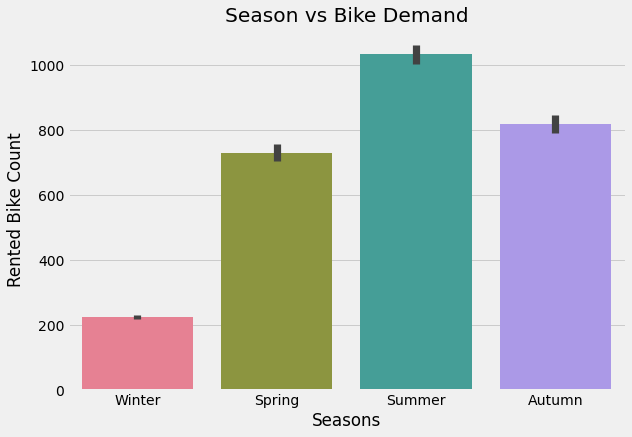

In [43]:
# Chart 21 Visualisation code
sns.catplot(data = df,x = 'Seasons',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Season vs Bike Demand')
plt.show()

Chart - 22

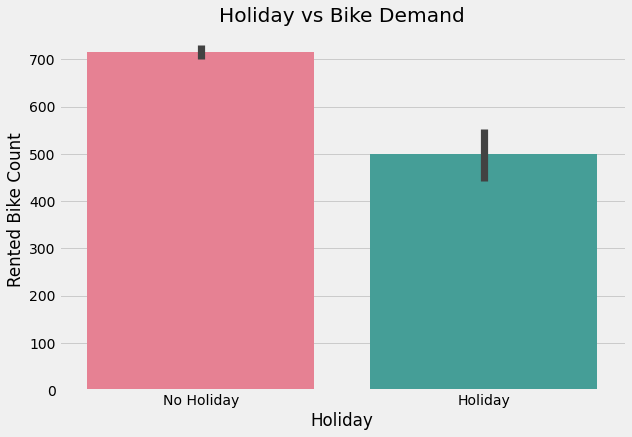

In [44]:
# Chart 22 Visualisation code
sns.catplot(data = df,x = 'Holiday',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 6,palette='husl')
plt.title('Holiday vs Bike Demand')
plt.show()

Chart - 23

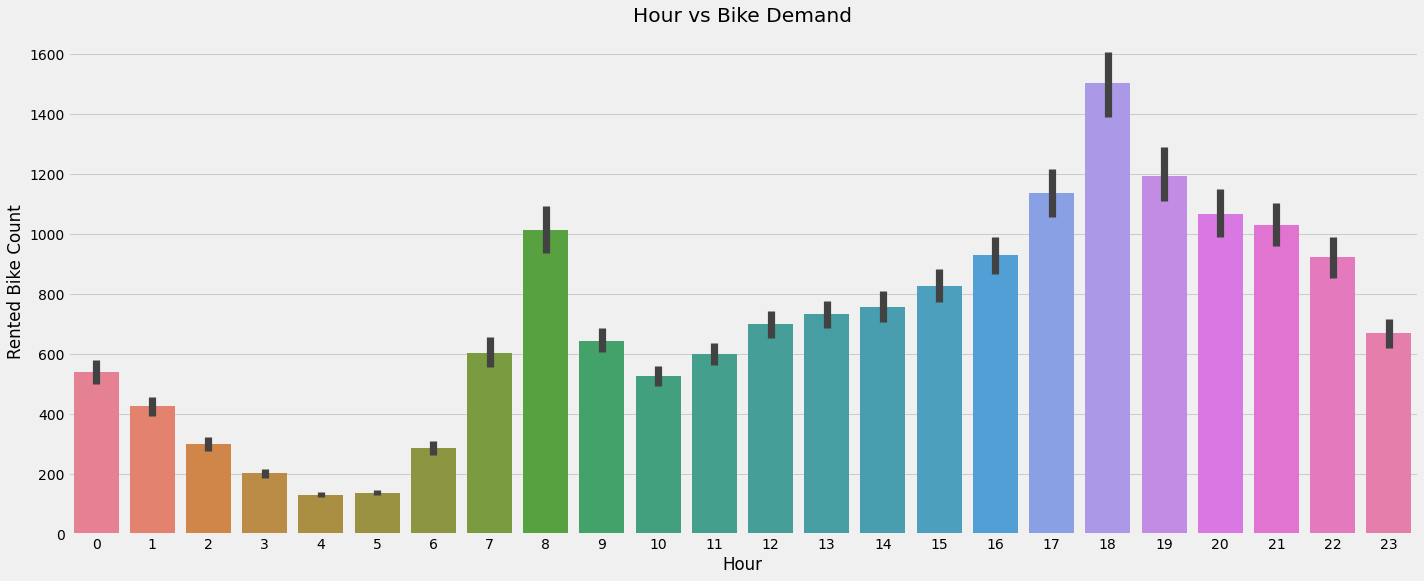

In [45]:
# Chart 23 Visualisation code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',kind = 'bar',aspect = 2.5,height = 8,palette='husl')
plt.title('Hour vs Bike Demand')
plt.show()

Chart - 24

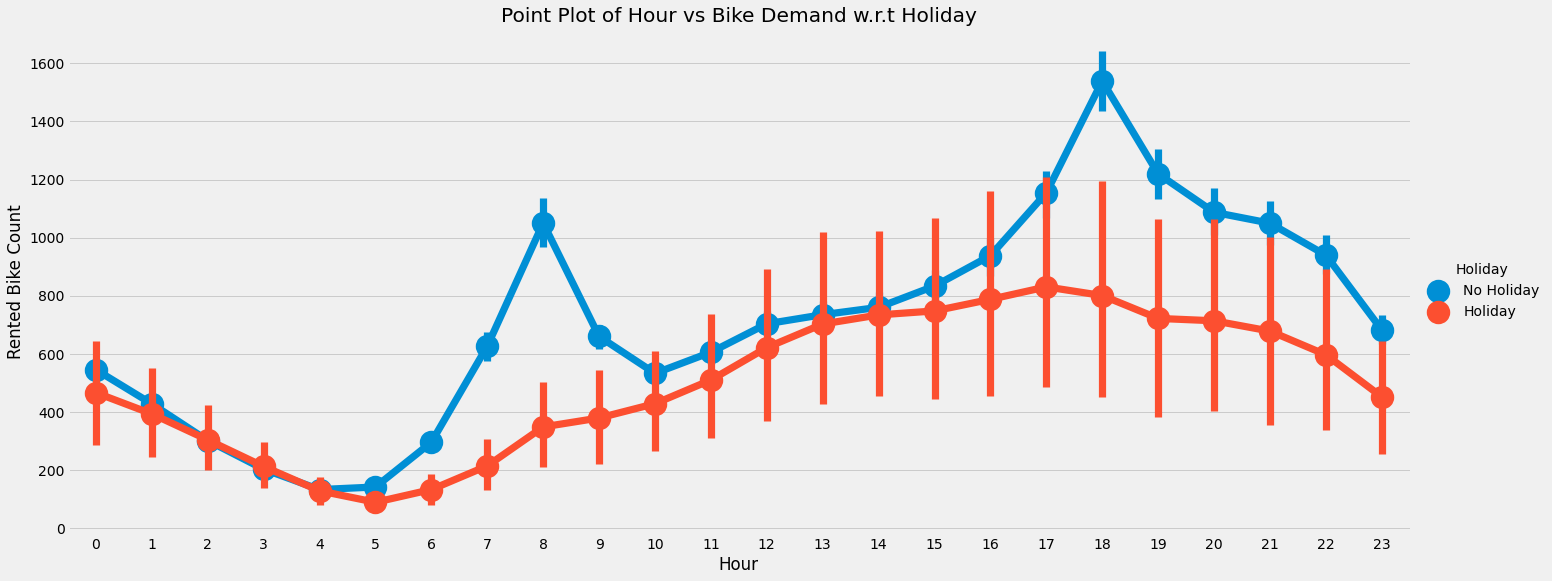

In [89]:
# Chart 24 Visualization code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Holiday',kind = 'point',aspect = 2.5,height = 8)
plt.title('Point Plot of Hour vs Bike Demand w.r.t Holiday')
plt.show()


Chart - 25

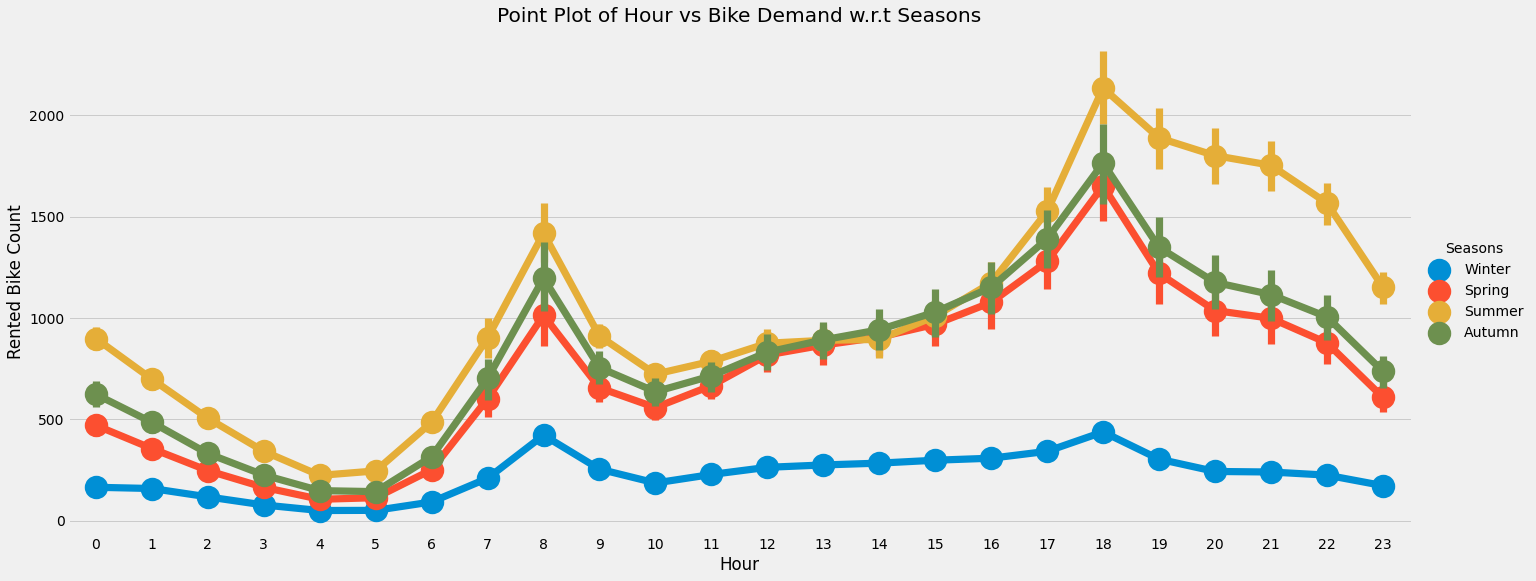

In [91]:
# Chart 25 Visualization code
sns.catplot(data = df,x = 'Hour',y = 'Rented Bike Count',hue = 'Seasons',kind = 'point',aspect = 2.5,height = 8)
plt.title('Point Plot of Hour vs Bike Demand w.r.t Seasons')
plt.show()

Chart-26

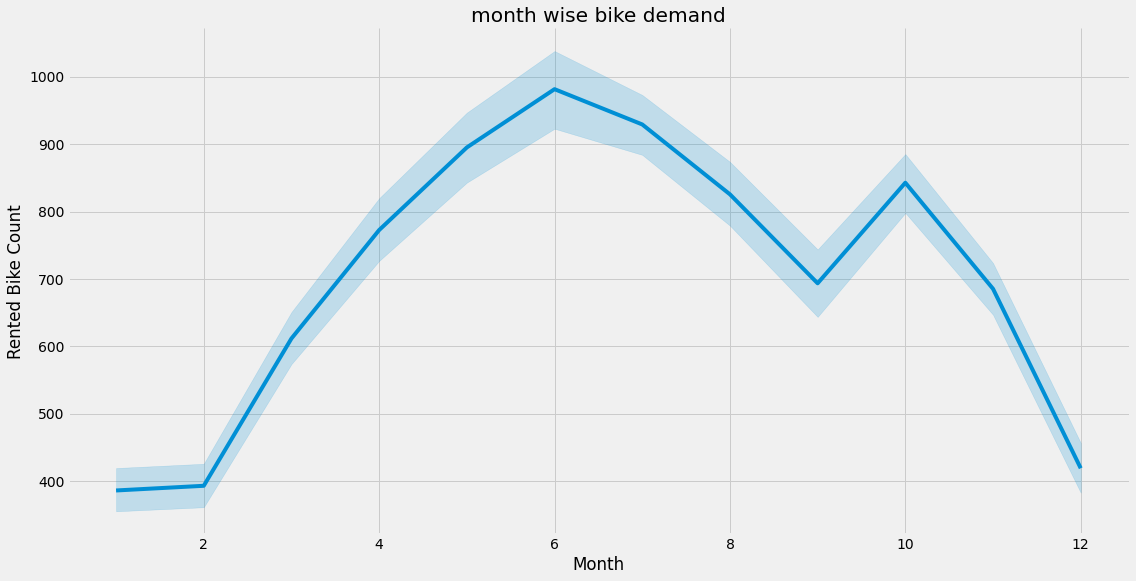

In [100]:
# Chart 26 visualization code
sns.relplot(data = df,x = 'Month',y = 'Rented Bike Count',kind = 'line',aspect = 2,height = 8)
plt.title('month wise bike demand')
plt.show()


Chart - 27

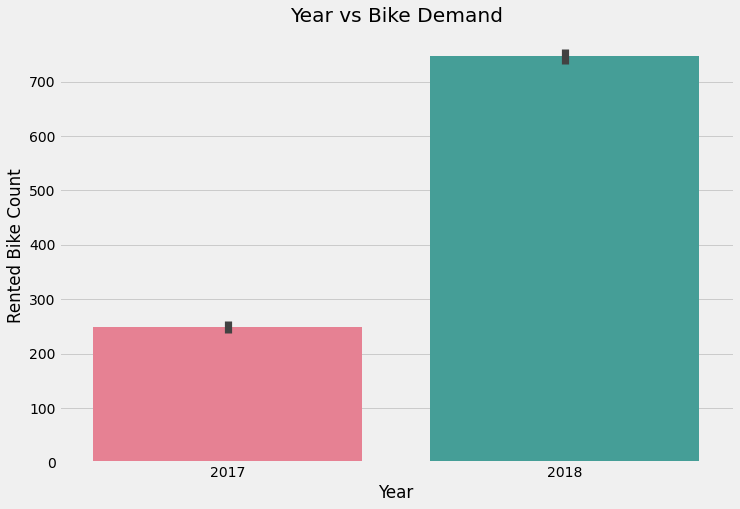

In [101]:
# Chart 27 Visualisation code
sns.catplot(data = df,x = 'Year',y = 'Rented Bike Count',kind = 'bar',aspect = 1.5,height = 7,palette='husl')
plt.title('Year vs Bike Demand')
plt.show()

#### Chart - 28 - Correlation Heatmap

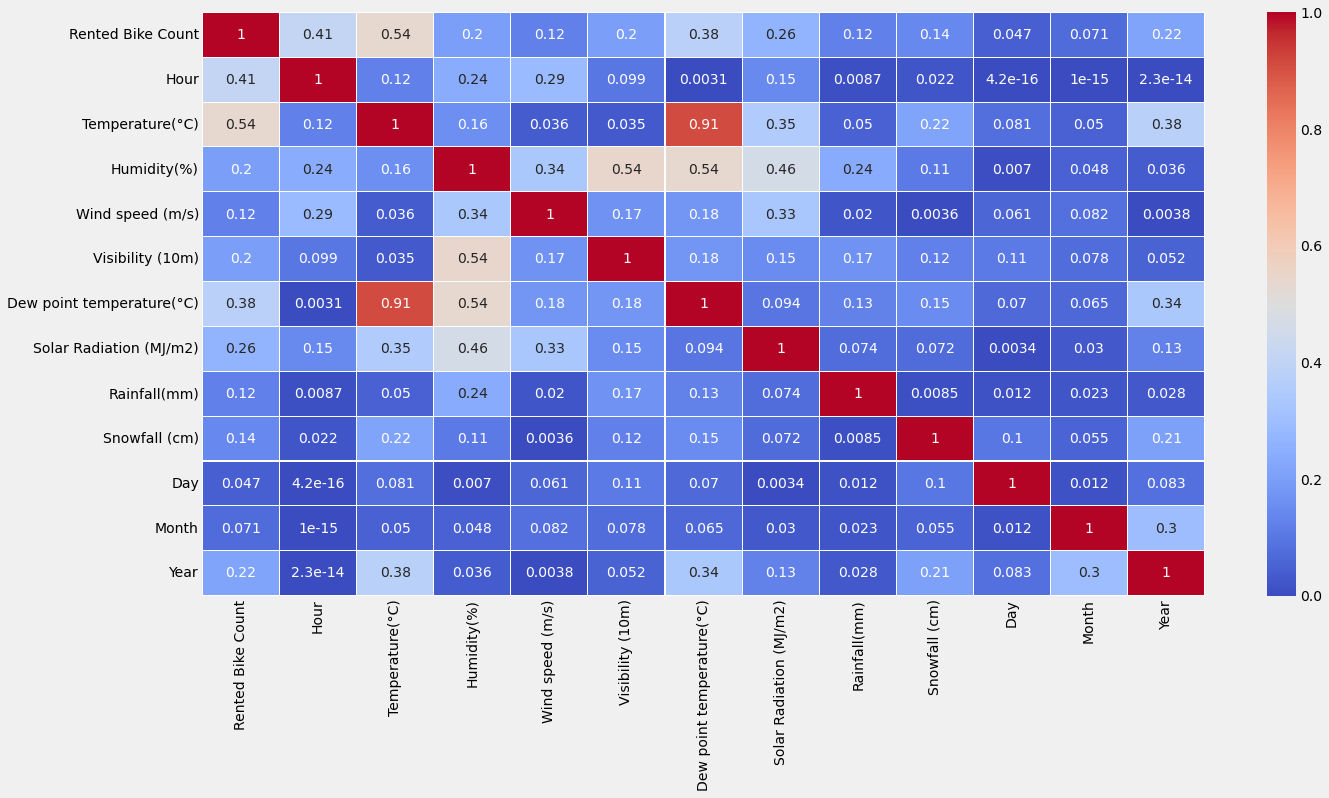

In [50]:
# Correlation Heatmap visualization code  
data_corr= df.corr()
plt.figure(figsize=(20,10))
sns.heatmap(abs(data_corr), cmap='coolwarm', linewidths=0.1, annot=True, linecolor='white')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [52]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [53]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [54]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [55]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [56]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [57]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing 
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [58]:
# Expand Contraction

#### 2. Lower Casing

In [59]:
# Lower Casing

#### 3. Removing Punctuations

In [60]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [61]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [62]:
# Remove Stopwords

In [63]:
# Remove White spaces

#### 6. Rephrase Text

In [64]:
# Rephrase Text

#### 7. Tokenization

In [65]:
# Tokenization

#### 8. Text Normalization

In [66]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [67]:
# POS Taging

#### 10. Text Vectorization

In [68]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [69]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [70]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [71]:
# Transform Your data

### 6. Data Scaling

In [72]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [73]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [74]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why? 

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [75]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [76]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [77]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [78]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [79]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [80]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [81]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [82]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [83]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [84]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [85]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***